# Preliminary Analysis

## Load data

In [1]:
# data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

# visualiation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
 
from utils import read_data

count, df = read_data(normalize = False)

Loaded  data/PRSA_Data_Gucheng_20130301-20170228.csv
Loaded  data/PRSA_Data_Huairou_20130301-20170228.csv
Loaded  data/PRSA_Data_Tiantan_20130301-20170228.csv
Loaded  data/PRSA_Data_Changping_20130301-20170228.csv
Loaded  data/PRSA_Data_Guanyuan_20130301-20170228.csv
Loaded  data/PRSA_Data_Nongzhanguan_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanliu_20130301-20170228.csv
Loaded  data/PRSA_Data_Dongsi_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanshouxigong_20130301-20170228.csv
Loaded  data/PRSA_Data_Aotizhongxin_20130301-20170228.csv
Loaded  data/PRSA_Data_Dingling_20130301-20170228.csv
Loaded  data/PRSA_Data_Shunyi_20130301-20170228.csv
35064 rows per station, total 382168 rows


In [2]:
df.head(10)

,time_stamp,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,WD_E,WD_ENE,WD_ESE,WD_N,WD_NE,WD_NNE,WD_NNW,WD_NW,WD_S,WD_SE,WD_SSE,WD_SSW,WD_SW,WD_W,WD_WNW,WD_WSW
20,21,13.0,25.0,12.0,5.0,1100.0,61.0,1.6,1027.1,-18.4,0.0,1.9,Gucheng,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
21,22,15.0,23.0,14.0,13.0,1200.0,52.0,1.0,1028.1,-17.4,0.0,0.7,Gucheng,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
22,23,16.0,28.0,16.0,19.0,1200.0,45.0,1.3,1028.4,-17.6,0.0,1.0,Gucheng,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,24,16.0,28.0,14.0,20.0,1100.0,44.0,0.2,1028.6,-17.6,0.0,1.1,Gucheng,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
24,25,14.0,18.0,24.0,43.0,1399.0,25.0,-0.3,1028.9,-18.0,0.0,1.4,Gucheng,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,26,18.0,39.0,25.0,28.0,1300.0,37.0,-0.7,1029.2,-17.9,0.0,1.0,Gucheng,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,27,19.0,29.0,30.0,13.0,1100.0,47.0,-0.8,1028.8,-18.0,0.0,1.4,Gucheng,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,28,15.0,24.0,20.0,12.0,1000.0,46.0,-1.2,1028.6,-17.9,0.0,1.1,Gucheng,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,29,13.0,16.0,21.0,24.0,1200.0,37.0,-1.3,1028.7,-18.9,0.0,1.1,Gucheng,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
29,30,12.0,23.0,26.0,11.0,1200.0,50.0,-1.3,1028.0,-18.4,0.0,1.4,Gucheng,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# Check data types
print(df.dtypes)

time_stamp      int64
PM2.5         float64
PM10          float64
SO2           float64
NO2           float64
CO            float64
O3            float64
TEMP          float64
PRES          float64
DEWP          float64
RAIN          float64
WSPM          float64
station        object
WD_E            uint8
WD_ENE          uint8
WD_ESE          uint8
WD_N            uint8
WD_NE           uint8
WD_NNE          uint8
WD_NNW          uint8
WD_NW           uint8
WD_S            uint8
WD_SE           uint8
WD_SSE          uint8
WD_SSW          uint8
WD_SW           uint8
WD_W            uint8
WD_WNW          uint8
WD_WSW          uint8
dtype: object


In [4]:
# Check no null rows
df.isnull().sum()

time_stamp    0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
WSPM          0
station       0
WD_E          0
WD_ENE        0
WD_ESE        0
WD_N          0
WD_NE         0
WD_NNE        0
WD_NNW        0
WD_NW         0
WD_S          0
WD_SE         0
WD_SSE        0
WD_SSW        0
WD_SW         0
WD_W          0
WD_WNW        0
WD_WSW        0
dtype: int64

## Data Distribution (Without normalization)

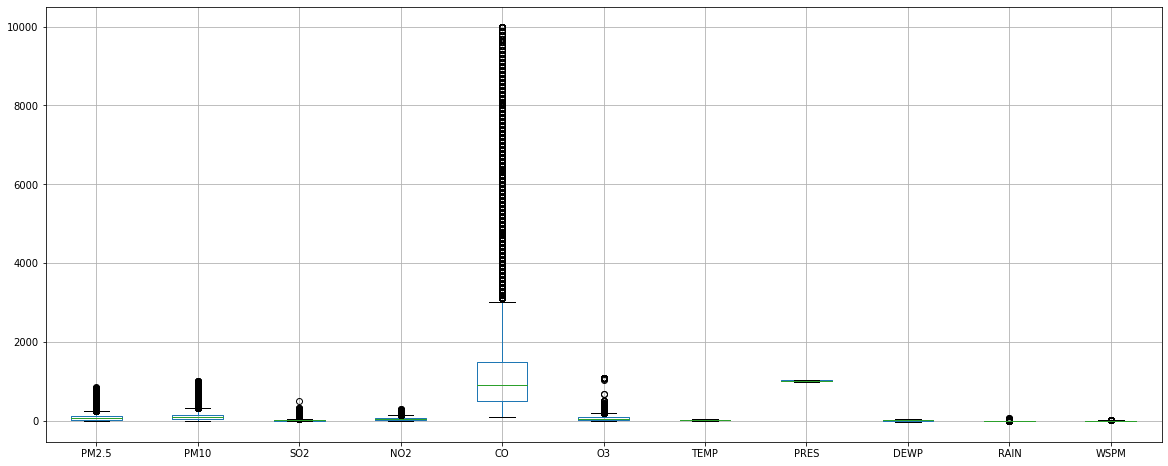

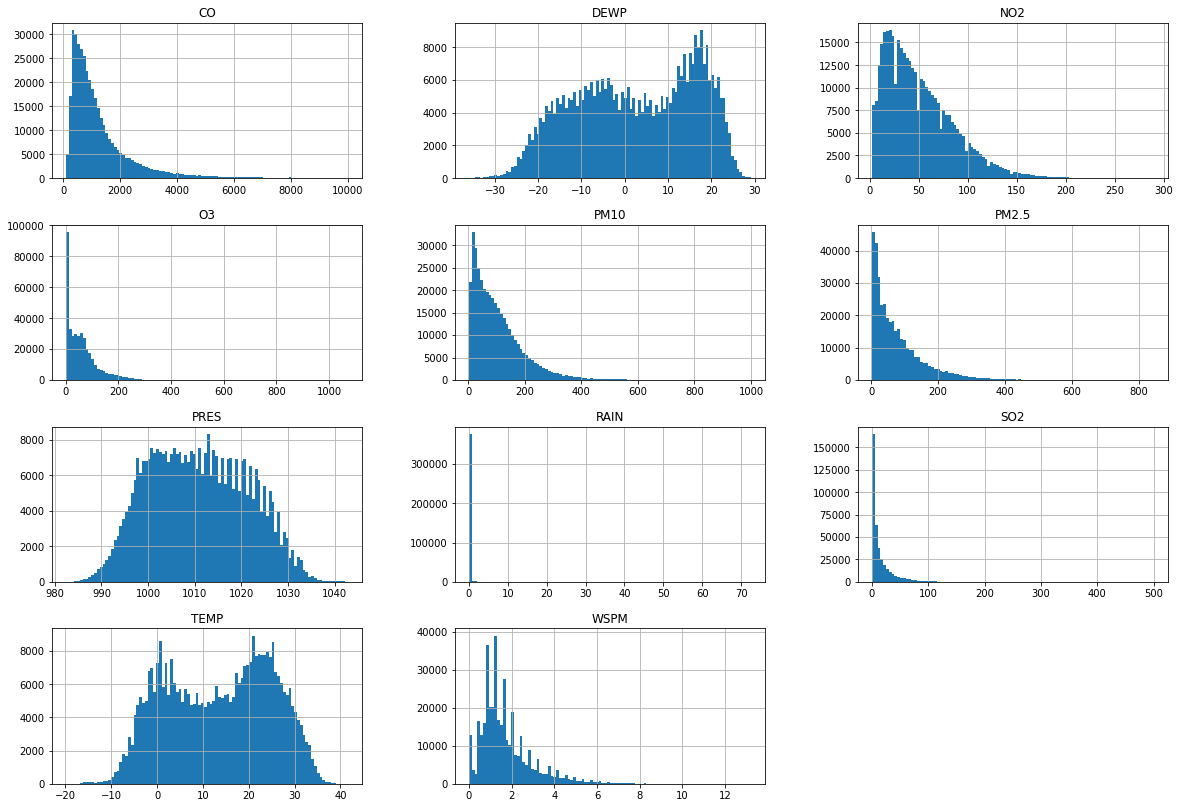

In [5]:
columns_for_plot = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
df.boxplot(column = columns_for_plot,figsize=[20,8])
df.hist(bins=100,column = columns_for_plot,figsize=[20,14]);

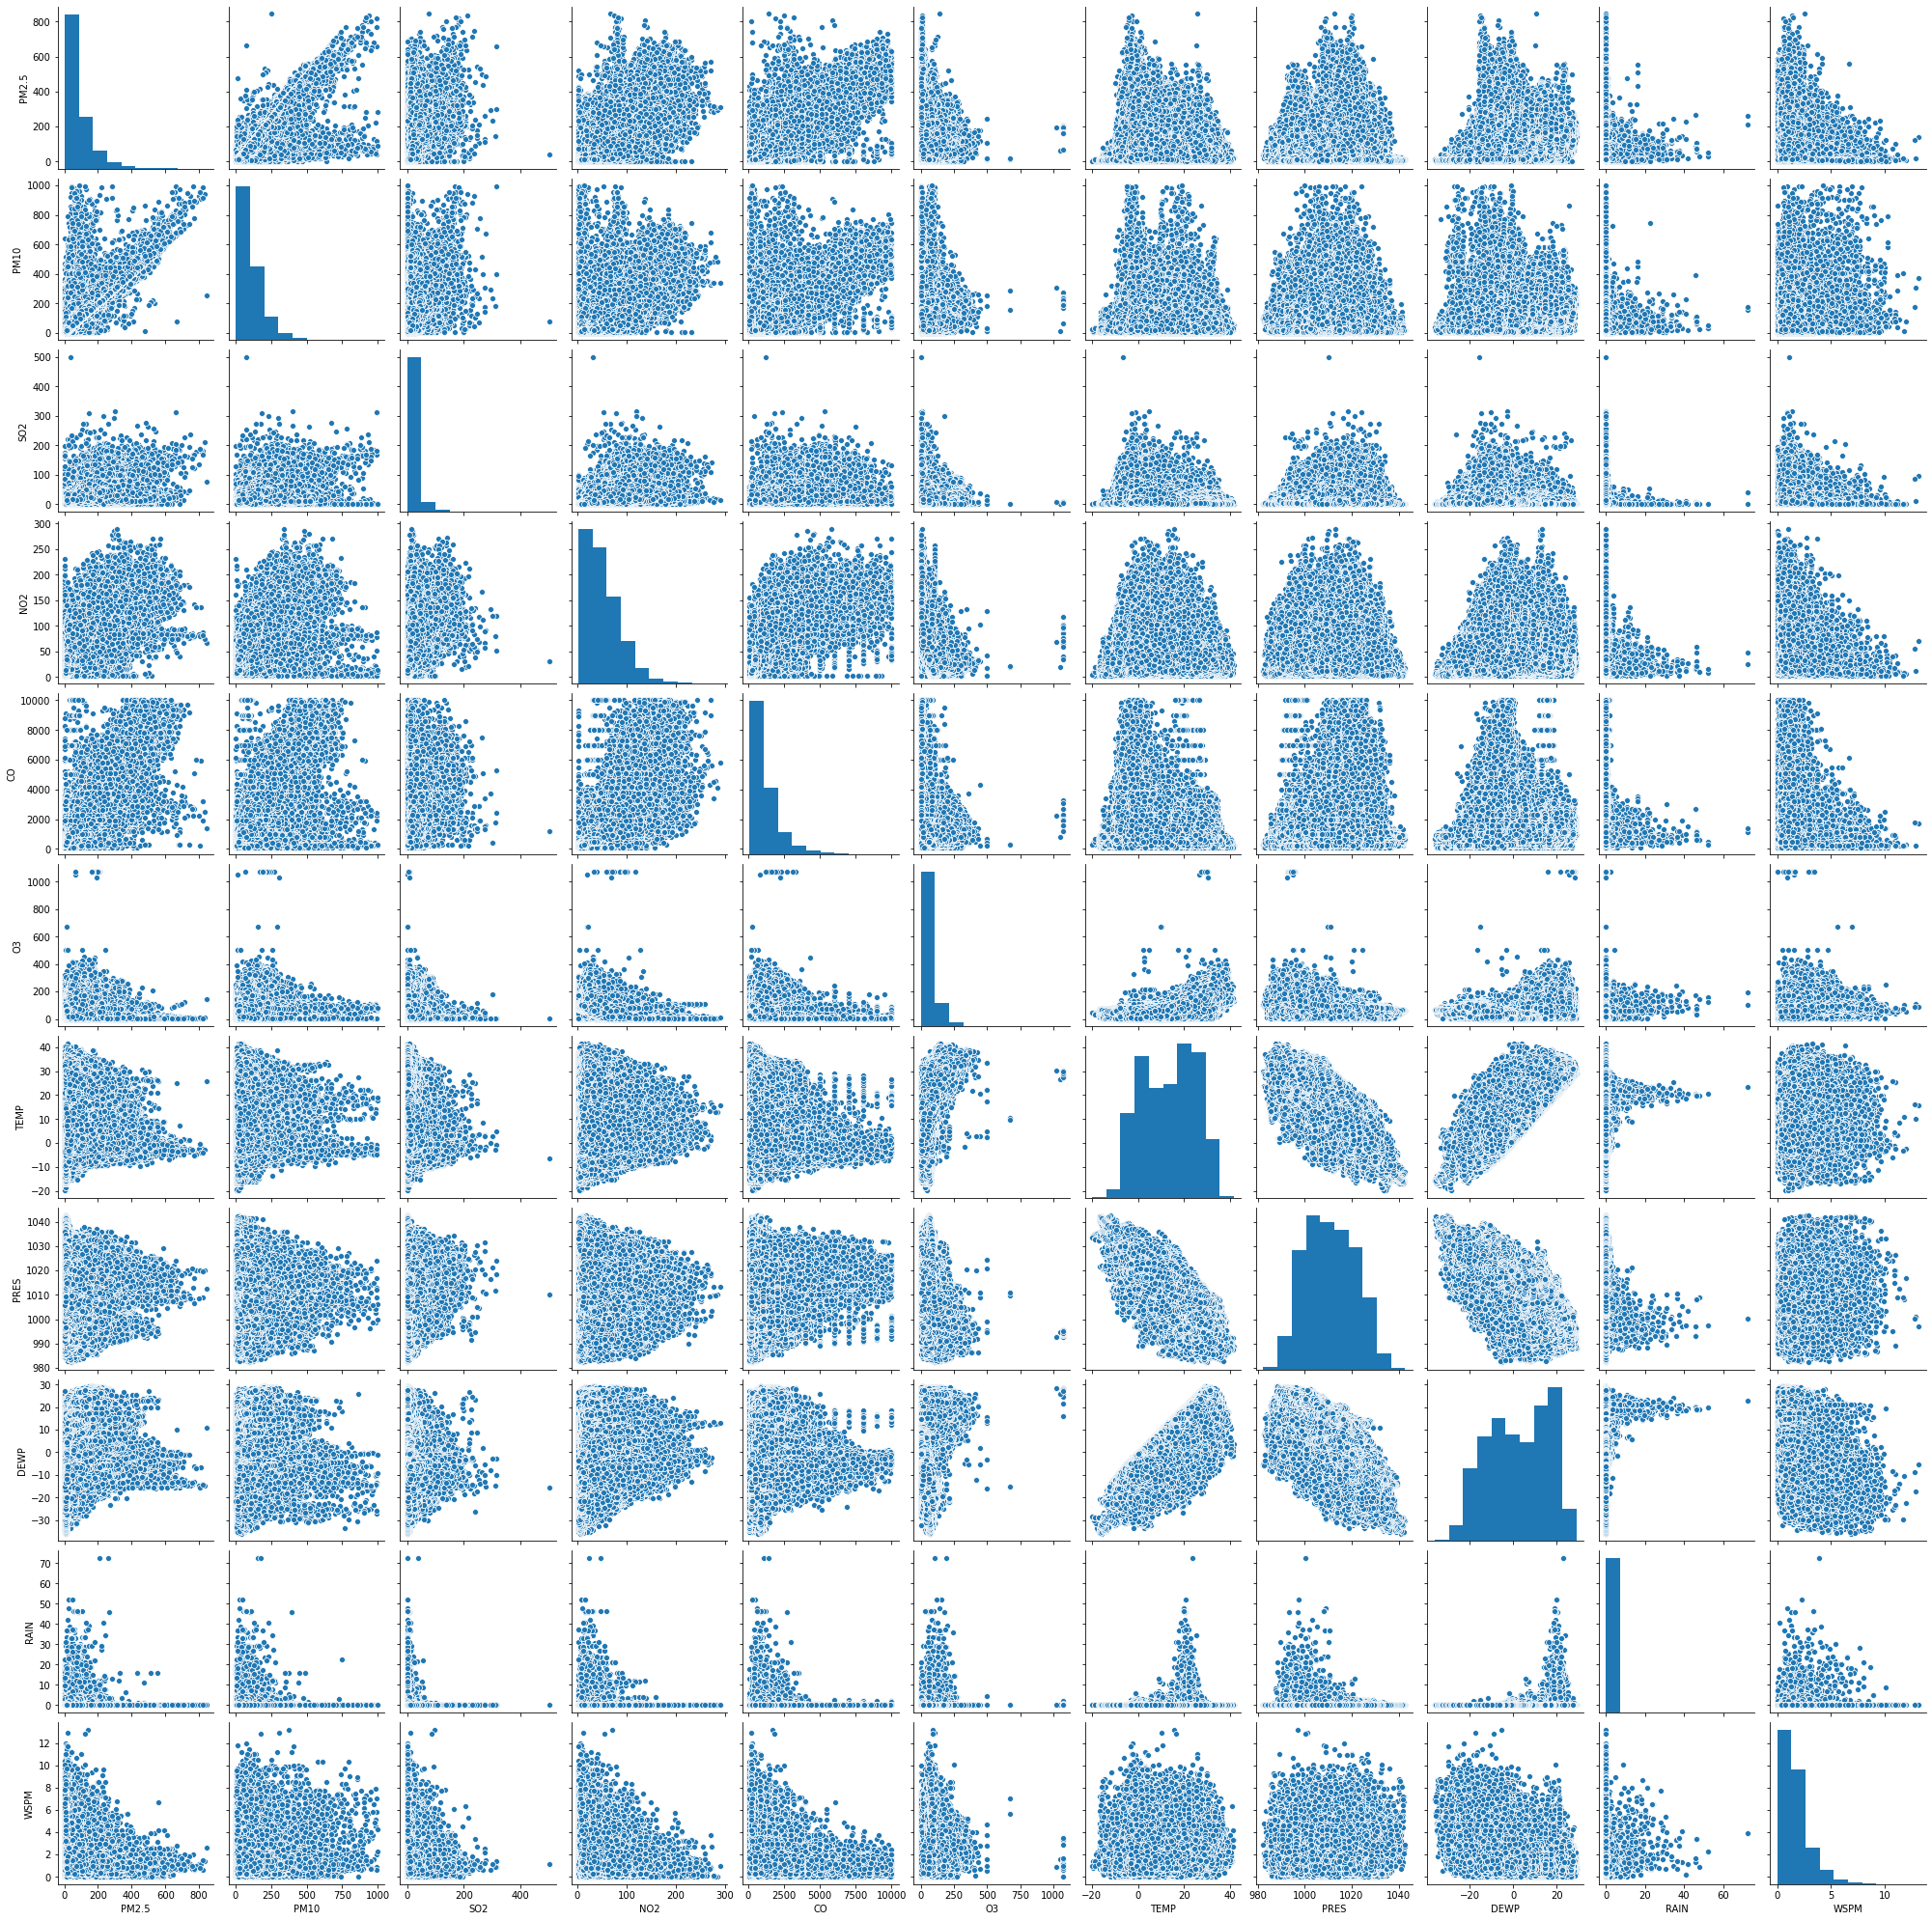

In [6]:
sns.pairplot(df, vars=columns_for_plot)

## Data Distribution (Without normalization)

Loaded  data/PRSA_Data_Gucheng_20130301-20170228.csv
Loaded  data/PRSA_Data_Huairou_20130301-20170228.csv
Loaded  data/PRSA_Data_Tiantan_20130301-20170228.csv
Loaded  data/PRSA_Data_Changping_20130301-20170228.csv
Loaded  data/PRSA_Data_Guanyuan_20130301-20170228.csv
Loaded  data/PRSA_Data_Nongzhanguan_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanliu_20130301-20170228.csv
Loaded  data/PRSA_Data_Dongsi_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanshouxigong_20130301-20170228.csv
Loaded  data/PRSA_Data_Aotizhongxin_20130301-20170228.csv
Loaded  data/PRSA_Data_Dingling_20130301-20170228.csv
Loaded  data/PRSA_Data_Shunyi_20130301-20170228.csv
Applied normalization on  ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
35064 rows per station, total 382168 rows


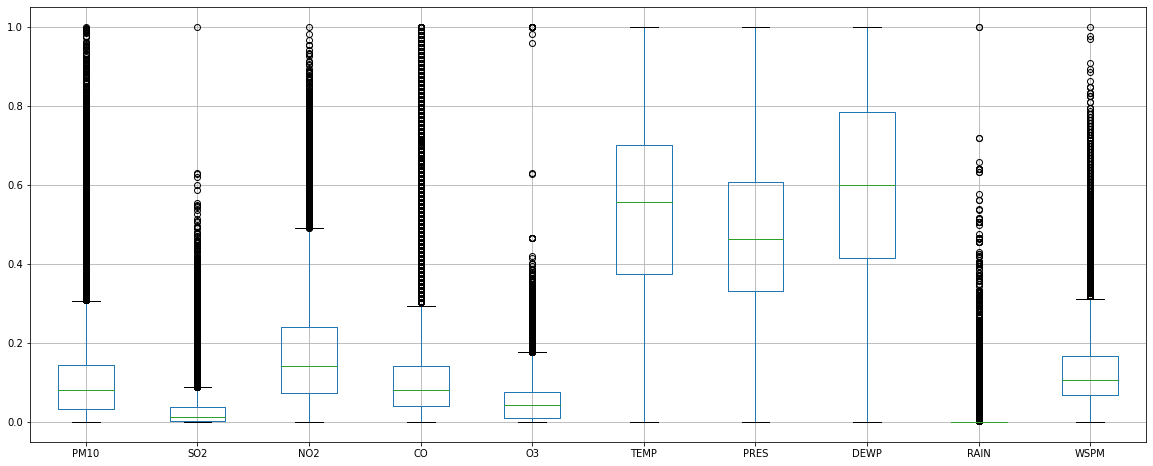

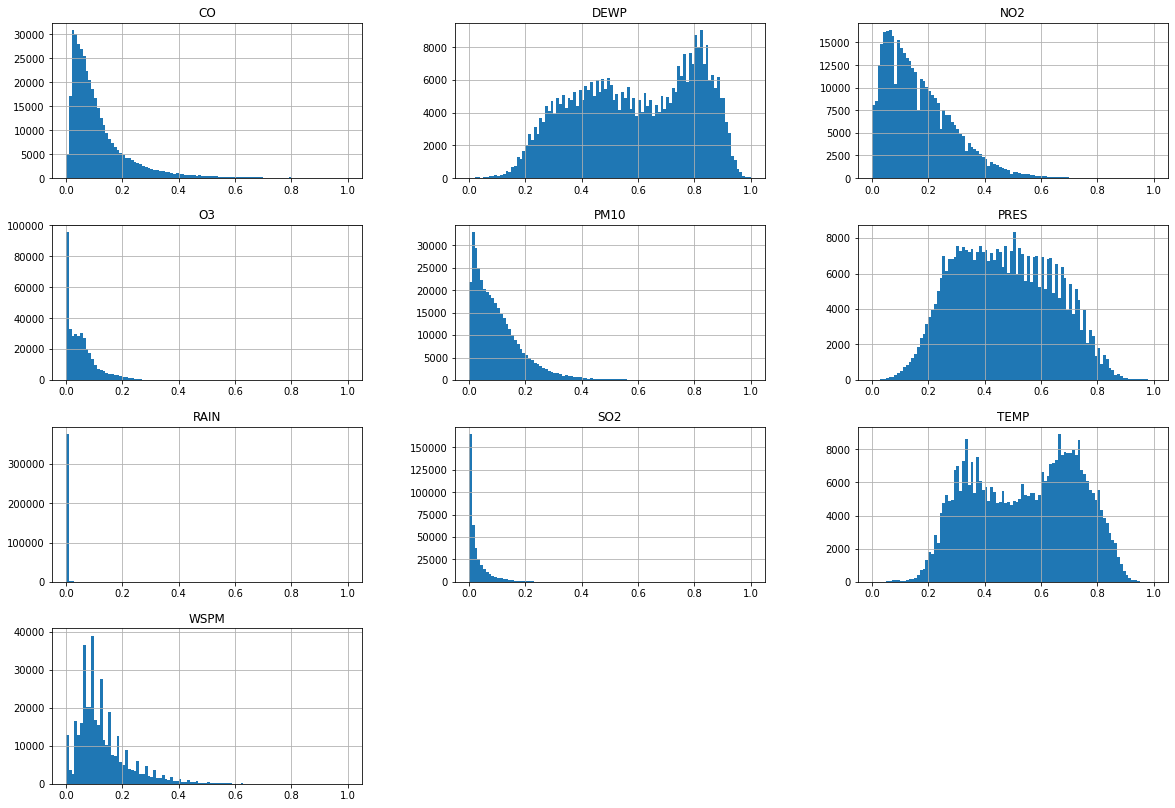

In [7]:
count, df_norm = read_data()
columns_for_plot = ['PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
df_norm.boxplot(column = columns_for_plot,figsize=[20,8])
df_norm.hist(bins=100,column = columns_for_plot,figsize=[20,14]);

In [8]:
## Correlation Coefficient wrt PM2.5

In [9]:
df.corr()['PM2.5']

time_stamp   -0.026866
PM2.5         1.000000
PM10          0.884324
SO2           0.482209
NO2           0.670753
CO            0.792041
O3           -0.151149
TEMP         -0.128907
PRES          0.013717
DEWP          0.118009
RAIN         -0.015268
WSPM         -0.275686
WD_E          0.075126
WD_ENE        0.066978
WD_ESE        0.068931
WD_N         -0.044709
WD_NE         0.025031
WD_NNE       -0.030502
WD_NNW       -0.083252
WD_NW        -0.102491
WD_S          0.027039
WD_SE         0.046943
WD_SSE        0.037291
WD_SSW        0.014006
WD_SW        -0.000453
WD_W         -0.013926
WD_WNW       -0.072002
WD_WSW       -0.006225
Name: PM2.5, dtype: float64